# Seattle City Crime Data Analysis

## 1: Motivation

As an international student in University of Washington, I am curious about the City of Seattle and would love to explore different city areas. By learning HCDE 410 and other data science classes in the UW, I am equipped with skills to analyze datasets and generate insights from them. Since I'm concerned about the city's public safety, I want to analyze its crime data to understand frequent crime types, in order to make me educated when going to different places. Research Question 2 is inspired from my past street-walking experience, especially when I'm walking in unfamiliar areas, as I'm concerned about whether it's more likely that a person attacks me or just wants my property (no personal harm if I comply).

Since I primarily reside in University District while studying in the UW, I want to learn the crime distribution in this area through study Question 3. Before COVID-19 pandemic that moves all UW classes online, I occasionally studied in UW libraries, where I discovered posters (from UW Police department) that urge students to protect their valuable items and never leave them unattended. In addition, I occasionally saw bikes (on bike rack) with missing parts, implying that an offender stole usable parts on students' bikes. 

## 2: Background and/or Related Work

While researching the Seattle Crime overview, I found [this US News article](https://realestate.usnews.com/places/washington/seattle/crime) describing that Seattle has "a \[relatively\] lower crime rate than similarly sized metro areas"; it has a higher rate of crimes against property and a lower rate of violent crimes (against people), comparing to the national average. Also, I learned that Seattle has a record high number of murder incidents in 2020, according to this [King5 news article](https://www.king5.com/article/news/local/seattle-police-reports-49-murders-setting-pace-for-record-homicides/281-c32aa4ae-ef9c-485f-a9d8-1113b491fc9d). Within the University of Washington; UW Police websites allow students to register [bicycles](https://bikeindex.org/uw) and [electronics](http://police.uw.edu/community-engagement/loveyourstuff/ereg/), and contents in these web pages describe the prevalence of thefts on them. Hence I assume that robbery/theft are the most frequent offense in the University District. Regarding how COVID-19 Pandemic affecting crime distribution, I remembered that attacks against people increases partially due to economic depression and discrimination against east Asian people (alleged origin of COVID-19).

I have adjusted my research question 2, 3, and 4 according to my background research, as I want to use the actual crime data from Seattle Police Department to verify claims made in these articles. In addition, I can learn whether robbery/theft crimes is the most frequent offense in the University District, and whether this crime is noticeably more frequent than the second most popular crime in this UW area. All in all, I hope my final project is related to HCDE 410's lecture regarding open data science where readers can use raw data to audit claims made in analytical reports.

## 3: Research questions

1. Do certain types of crime offenses have become more popular after the onset of COVID-19 Pandemic?
2. Do crimes against a person happen more frequently than crimes against property in Seattle, generally?
3. Within the University District, what are most frequent crime offenses.
4. Does Seattle has a record high homicide crime counts in 2020?

### 3-1: Hypothesis:**

1. Personal assault crimes have become more popular during COVID-19.
2. I hypothesize that crime against property happens more frequently than crimes against a person. 
3. Robbery/theft are the most frequent offenses in the University District.
4. Seattle does have a record high homicide crime count in 2020.


## 4: Data Source

**Seattle City Crime Data**

This data is provided by the City of Seattle Police Department documents city-wide crime data since 2008. It is comprehensive, including offense time, type of crime, large neighborhood district, providing me many ways to analyze the crime distribution in Seattle.

[Dataset source](https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5) (Time Range: from 2008 to present)

License: Public Domain

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from datetime import datetime, timedelta

In [2]:
#ggplot2 in R is a very intuitive and easy to understand graph programming syntax (and there're just a lot of articles on ggplot due to its popularity)
#One noticeable limitation for plotnine it that it could not draw pie chart (it lacks coord_polar implementation)

#!conda install plotnine # if plotnine is not already installed
#!pip install plotnine # if plotnine is not already installed
from plotnine import * #plotnine contains ggplot function
# from plotnine.data import mpg #import ggplot's sample data (such as mpg), useful for debugging

In [3]:
#the URL we're retrieving the data from. Copy/paste it into your browser to view it!
api_endpoint = "https://data.seattle.gov/resource/tazs-3rd5.csv"

#the parameters we're passing to the API, to specify what subset of data we want.
api_parameters = "?$limit=1000000&" # Increase limit to 1000000, increase this number if dataset has more available rows 
api_parameters = api_parameters + "$select=offense_start_datetime,crime_against_category,offense_parent_group,offense,mcpp&" # Only select columns that I need for my data analysis
api_parameters = api_parameters + "$$app_token=" + open("data/token.txt", "r").readline()

print('Downloading .csv from ' + api_endpoint + api_parameters)
police_data = pd.read_csv(api_endpoint + api_parameters)

In [4]:
print(police_data)

         offense_start_datetime crime_against_category  \
0       2020-02-05T10:10:00.000                SOCIETY   
1       2020-02-03T08:00:00.000               PROPERTY   
2       2020-02-02T20:30:00.000               PROPERTY   
3       2020-02-05T01:17:00.000               PROPERTY   
4       2020-02-05T00:51:21.000                SOCIETY   
...                         ...                    ...   
904637  2013-07-13T01:00:00.000               PROPERTY   
904638  2013-06-26T11:00:00.000               PROPERTY   
904639  2012-02-14T15:04:00.000               PROPERTY   
904640  2010-09-19T16:59:00.000               PROPERTY   
904641  2010-02-25T18:00:00.000               PROPERTY   

                            offense_parent_group  \
0                         DRUG/NARCOTIC OFFENSES   
1                                  LARCENY-THEFT   
2                                        ROBBERY   
3       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
4                    DRIVING UNDER THE INFL

## 5: Methodology

### 5-1: Pre-analysis data cleaning

Convert date string (from all four datasets) to Python datetime object so we can compare equality of dates across different datasets.

Also, I decide to remove `offense_start_datetime` before 2008-01-01, as the website stated that only data that's recorded on and after 2008 is present in dataset. Since crimes happened earlier than 2008 may be entered to this dataset, such number of crimes may be noticeably less than actual number of incidents, which would make my analysis (on crime incidents happened before 2008) biased. In fact, we only remove 2644 cases (904314-901670) dated before 2008-01-01 (calculated on 2021-05-27).

In [5]:
# Drop mili-seconds due to Python's Date format does not recognize 3-digit mili-second (it only recognize micro-second)
police_data['offense_start_date_cleaned'] = pd.to_datetime(police_data['offense_start_datetime'], format='%Y-%m-%dT%H:%M:%S') 

# Drop offense_start_datetime before 2008-01-01
police_data_cleaned = police_data[police_data['offense_start_date_cleaned'] >= datetime.strptime('2008-01-01', '%Y-%m-%d')]

# Drop pre-parsed date time column
police_data_cleaned = police_data_cleaned.drop(columns=['offense_start_datetime'])

#print(police_data)
print(police_data_cleaned)

       crime_against_category                      offense_parent_group  \
0                     SOCIETY                    DRUG/NARCOTIC OFFENSES   
1                    PROPERTY                             LARCENY-THEFT   
2                    PROPERTY                                   ROBBERY   
3                    PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
4                     SOCIETY               DRIVING UNDER THE INFLUENCE   
...                       ...                                       ...   
904637               PROPERTY                       MOTOR VEHICLE THEFT   
904638               PROPERTY                       MOTOR VEHICLE THEFT   
904639               PROPERTY                             LARCENY-THEFT   
904640               PROPERTY                             LARCENY-THEFT   
904641               PROPERTY                       MOTOR VEHICLE THEFT   

                                            offense                 mcpp  \
0                      

### 5-2: increased crime type after the onset of COVID-19 Pandemic

To determine whether certain types of crimes will become more popular after the onset of COVID-19 Pandemic, I first tally the monthly total of every crime type from 2019-01-01 to 2020-12-31. Then, I will make a time series graph of all crime types to visually inspect the growing trend of certain crimes after 2020-01-01.

In this analysis, I decide to use `offense_parent_group` instead of a more detailed `offense`, as the number of unique `offense` is more than the capacity limit of a presentable time-series graph (for aesthestic purposes)

In [6]:
# Select police data between 2019-01-01 and 2020-12-31
police_data_COVID = police_data_cleaned[(police_data_cleaned['offense_start_date_cleaned'] >= datetime.strptime('2019-01-01', '%Y-%m-%d')) & (police_data_cleaned['offense_start_date_cleaned'] <= datetime.strptime('2020-12-31', '%Y-%m-%d'))]

# Remove crime_against_category, mcpp, and offense columns that are not needed for 5-2 analysis
police_data_COVID = police_data_COVID.drop(columns=['crime_against_category', 'mcpp', 'offense'])

#print(police_data_COVID.head(10))

# Print all unique offense_parent_group String values
#print(police_data_COVID['offense_parent_group'].unique())

In [7]:
# Create zero-filled dataframe that holds the count of each offense_parent_group
index = pd.Series(pd.date_range(datetime.strptime('2019-01', '%Y-%m'), datetime.strptime('2021-01', '%Y-%m'), freq='M'))
index = index.dt.strftime('%Y-%m')

# Use unique value of offense_parent_group (in police data) as column header
columns = police_data_COVID['offense_parent_group'].unique()
 
COVID_offence_tally = pd.DataFrame(index=index, columns=columns)
COVID_offence_tally = COVID_offence_tally.fillna(0)

# Using code above, the data frame's index is the month; hence we need to create another month columns (whose values are year and month only)
COVID_offence_tally['Month'] = COVID_offence_tally.index
COVID_offence_tally['Month'] = COVID_offence_tally['Month'].astype('string')

#print(COVID_offence_tally.dtypes)
#print(COVID_offence_tally)

In [8]:
# Tally number of offences

limit = 10
count = 0

for index, row in police_data_COVID.iterrows():
    date = row['offense_start_date_cleaned']
    one_offense = row['offense_parent_group']
    month_string = date.strftime("%Y-%m")
    #print(month_string + ' ' + one_offense)
    COVID_offence_tally.loc[COVID_offence_tally['Month'] == month_string, one_offense] += 1
    count = count + 1
    
#print('Now printing the monthly offence tally')
#print(COVID_offence_tally)

# Make a .csv file so end users can use a software of their choice to produce different plots.
COVID_offence_tally.to_csv('Question 1 out.csv', index=False)  

Convert `COVID_offence_tally` to long-format to assist ploting in **4-3**

In [9]:
COVID_offence_tally_long = pd.melt(frame=COVID_offence_tally, id_vars=['Month'], var_name="Offence Type", value_name="Count")
COVID_offence_tally_long['Month']= pd.to_datetime(COVID_offence_tally_long['Month'], format='%Y-%m')
#print(COVID_offence_tally_long)

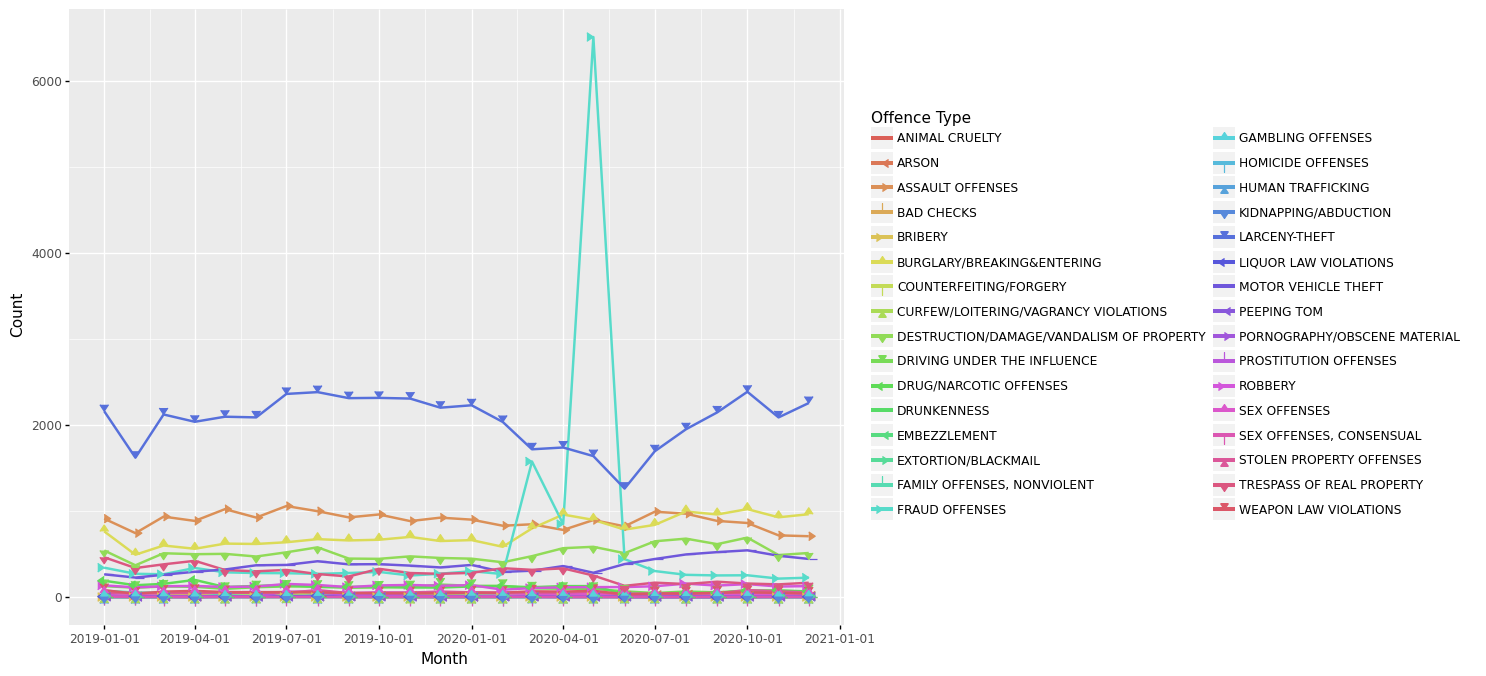

<ggplot: (8770693557330)>

In [23]:
(
    ggplot(data=COVID_offence_tally_long, mapping=aes(x='Month', y='Count', color='Offence Type')) +
    geom_line(size = 1)+
    #facet_grid('Offence Type ~ .', scales = "free") +
    labs(fill="") + 
    theme(figure_size=(10, 8)) +
    geom_point(aes(shape='Offence Type', color='Offence Type'), size=3) +
    # Add shape variations to distinguish lines with similar colors.
    scale_shape_manual(values=[1, 4, 9, 2, 5, 10, 3, 6, 11, 7, 8, 1, 4, 9, 2, 5, 10, 3, 6, 11, 7, 8, 1, 4, 9, 2, 5, 10, 3, 6, 11, 7, 8])
)

Since readers can only show the trend of top **7** most frequent crimes, I will make a separate graphs of other crimes.

In [27]:
frequent_crimes = ['FRAUD OFFENSES', 'LARCENY-THEFT', 'ASSAULT OFFENSES', 'BURGLARY/BREAKING&ENTERING', 'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 'MOTOR VEHICLE THEFT', 'TRESPASS OF REAL PROPERTY']
#COVID_offence_tally_long_other_crimes = COVID_offence_tally_long.drop(COVID_offence_tally_long[COVID_offence_tally_long['Offence Type'].isin(frequent_crimes)].index)

COVID_offence_tally_long_other_crimes=COVID_offence_tally_long[~COVID_offence_tally_long['Offence Type'].isin(frequent_crimes)]

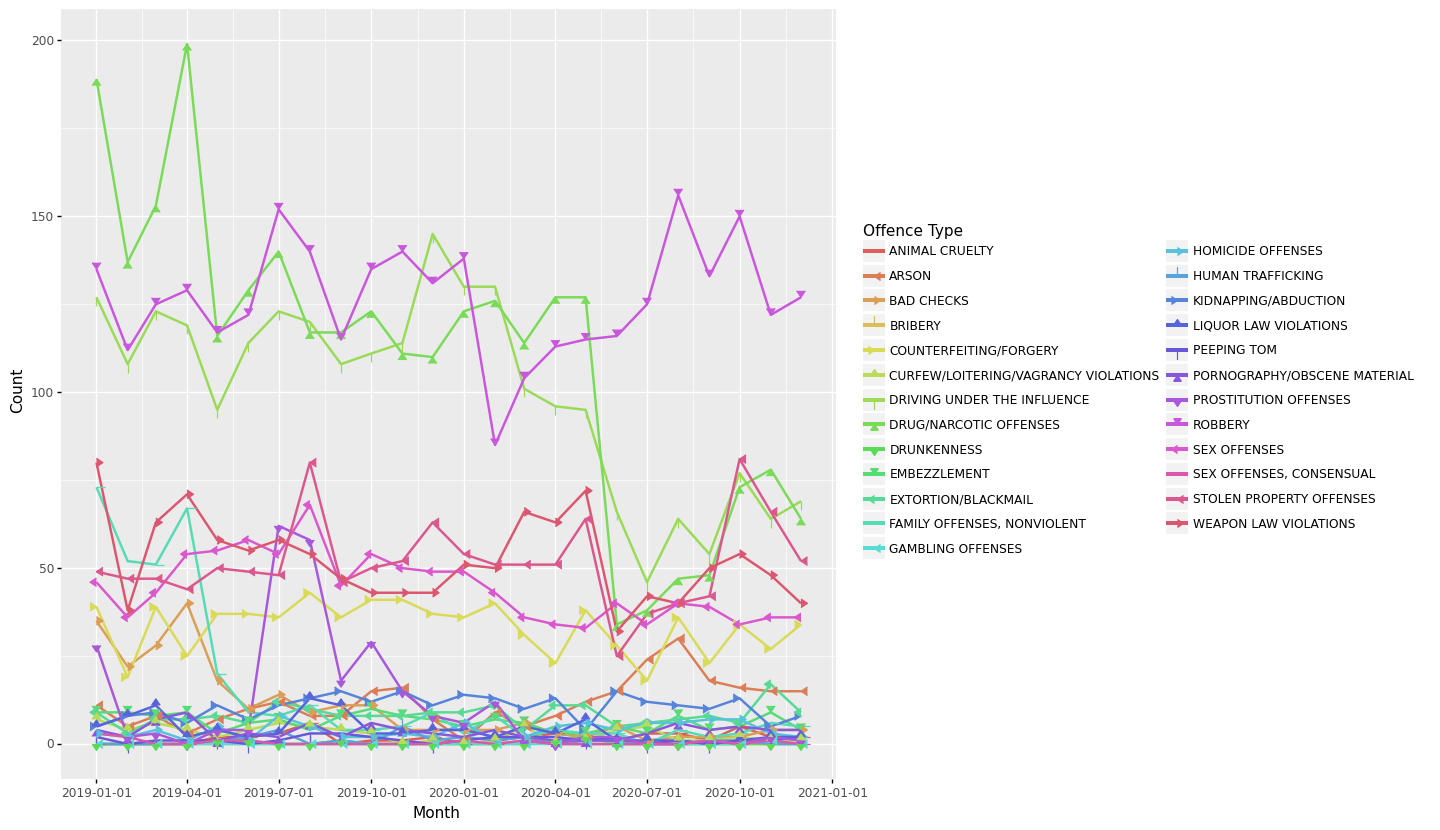

<ggplot: (8770693588917)>

In [31]:
(
    ggplot(data=COVID_offence_tally_long_other_crimes, mapping=aes(x='Month', y='Count', color='Offence Type')) +
    geom_line(size = 1)+
    #facet_grid('Offence Type ~ .', scales = "free") +
    labs(fill="") + 
    theme(figure_size=(10, 10)) +
    # You can make the graph longer by commenting the command above and un-comment below command, but minor crimes fluctuates with no obvious trend soon after 2020-01-01
    #theme(figure_size=(10, 50)) +
    geom_point(aes(shape='Offence Type', color='Offence Type'), size=3) +
    # Add shape variations to distinguish lines with similar colors.
    scale_shape_manual(values=[1, 4, 9, 2, 5, 10, 3, 6, 11, 7, 8, 1, 4, 9, 2, 5, 10, 3, 6, 11, 7, 8, 1, 4, 9, 2, 5, 10, 3, 6, 11, 7, 8])
)

### 5-3: compare person and property offences

While researching the Seattle Crime overview, I found [this US News article](https://realestate.usnews.com/places/washington/seattle/crime) describing that Seattle has "a \[relatively\] lower crime rate than similarly sized metro areas"; it has a **higher rate of crimes against property** and a **lower rate of violent crimes** (against people), comparing to the national average.

For this question, I will tally the total occurrence of time against person and property in every calendar day. By conducting a student t-test on two sets of data, I can determine whether it's statistically significant to conclude whether crimes against person happen more frequently than crimes against property. 

In [11]:
# 5-3 only uses offense_start_date_cleaned and crime_against_category
police_data_person_property = police_data_cleaned[['offense_start_date_cleaned', 'crime_against_category']]

# Only keep rows which crime_against_category is either PERSON or PROPERTY (df.loc[].....?)
police_data_person_property = police_data_person_property[(police_data_person_property['crime_against_category'] == 'PERSON') | (police_data_person_property['crime_against_category'] == 'PROPERTY')]

print(police_data_person_property.head(10))

# Print all unique offense_parent_group String values
#print(police_data_COVID['offense_parent_group'].unique())

   offense_start_date_cleaned crime_against_category
1         2020-02-03 08:00:00               PROPERTY
2         2020-02-02 20:30:00               PROPERTY
3         2020-02-05 01:17:00               PROPERTY
5         2020-02-04 22:59:00               PROPERTY
6         2020-02-04 20:30:00               PROPERTY
7         2020-02-04 19:58:00               PROPERTY
9         2020-02-04 21:00:00               PROPERTY
10        2020-02-04 20:57:00               PROPERTY
11        2019-02-04 00:00:00               PROPERTY
12        2020-01-30 19:30:00               PROPERTY


In [12]:
# Create zero-filled dataframe that holds the count of each crime_against_category (from 2008-01-01 to yesterday, as today's data is not uploaded until tomorrow)
index = pd.Series(pd.date_range(datetime.strptime('2008-01', '%Y-%m'), (datetime.today()- timedelta(days=2)), freq='D'))
index = index.dt.strftime('%Y-%m-%d')

# Use unique value of crime_against_category (in police data) as column header
columns = police_data_person_property['crime_against_category'].unique()
 
person_property_offense_tally = pd.DataFrame(index=index, columns=columns)
person_property_offense_tally = person_property_offense_tally.fillna(0)

# Using code above, the data frame's index is the day; hence we need to create another month columns (whose values are year and month only)
person_property_offense_tally['Date'] = person_property_offense_tally.index
person_property_offense_tally['Date'] = person_property_offense_tally['Date'].astype('string')

#print(person_property_offense_tally.dtypes)
print(person_property_offense_tally)

            PROPERTY  PERSON        Date
2008-01-01         0       0  2008-01-01
2008-01-02         0       0  2008-01-02
2008-01-03         0       0  2008-01-03
2008-01-04         0       0  2008-01-04
2008-01-05         0       0  2008-01-05
...              ...     ...         ...
2021-05-22         0       0  2021-05-22
2021-05-23         0       0  2021-05-23
2021-05-24         0       0  2021-05-24
2021-05-25         0       0  2021-05-25
2021-05-26         0       0  2021-05-26

[4895 rows x 3 columns]


In [13]:
# Tally number of offences

limit = 10
count = 0

for index, row in police_data_person_property.iterrows():
    date = row['offense_start_date_cleaned']
    one_offense = row['crime_against_category']
    date_string = date.strftime("%Y-%m-%d")
    #print(date_string + ' ' + one_offense)
    person_property_offense_tally.loc[person_property_offense_tally['Date'] == date_string, one_offense] += 1
    count = count + 1
    
#print('Now printing the daily person/property offense tally')
print(person_property_offense_tally)

# Make a .csv file so end users can use a software of their choice to produce different plots.
person_property_offense_tally.to_csv('Question 2 out.csv', index=False)

            PROPERTY  PERSON        Date
2008-01-01       190      66  2008-01-01
2008-01-02       107      17  2008-01-02
2008-01-03       122      13  2008-01-03
2008-01-04       140      25  2008-01-04
2008-01-05       119      28  2008-01-05
...              ...     ...         ...
2021-05-22       101      32  2021-05-22
2021-05-23       101      22  2021-05-23
2021-05-24        70      24  2021-05-24
2021-05-25        21      17  2021-05-25
2021-05-26         6       2  2021-05-26

[4895 rows x 3 columns]


Conduct a two-sample student-t test to verify whether it's statistically significant to conclude that Seattle has more property offense vs person offense.

Null hypothesis: Seattle has equally frequent number of daily property offense and person offense 

Alternative hypothesis: Seattle's daily property offense count is greater than daily person offense count

In [14]:
from scipy import stats

# Documentation of 2-sample t-test that I'm using: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind
t_statistics, p_value = stats.ttest_ind(person_property_offense_tally['PROPERTY'], person_property_offense_tally['PERSON'], equal_var = True, alternative='greater')

print("t-statistics score is: " + str(t_statistics))
print("P value is: " + str(p_value))

t-statistics score is: 239.97853647470015
P value is: 0.0


Convert to long-format dataframe and plot time series graph to visually understand the statistic significance between number of two types of crime categories.

In [15]:
person_property_offense_tally_long = pd.melt(frame=person_property_offense_tally, id_vars=['Date'], var_name="Offense Category", value_name="Count")
person_property_offense_tally_long['Date']= pd.to_datetime(person_property_offense_tally_long['Date'], format='%Y-%m-%d')
#print(person_property_offense_tally_long)

           Date Offense Category  Count
0    2008-01-01         PROPERTY    190
1    2008-01-02         PROPERTY    107
2    2008-01-03         PROPERTY    122
3    2008-01-04         PROPERTY    140
4    2008-01-05         PROPERTY    119
...         ...              ...    ...
9785 2021-05-22           PERSON     32
9786 2021-05-23           PERSON     22
9787 2021-05-24           PERSON     24
9788 2021-05-25           PERSON     17
9789 2021-05-26           PERSON      2

[9790 rows x 3 columns]


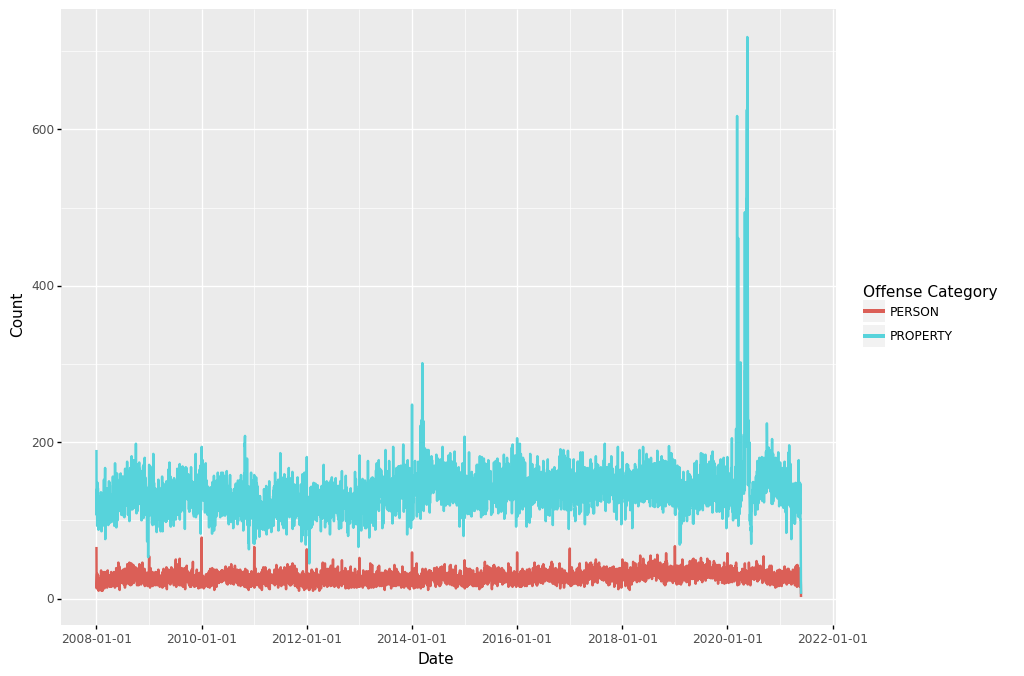

<ggplot: (8770693596944)>

In [16]:
(
    ggplot(person_property_offense_tally_long, aes(x='Date', y='Count', color='Offense Category')) +
    geom_line(size = 1)+
    labs(fill="") + 
    theme(figure_size=(10, 8))
)

### 5-4: find most frequent offenses in University District

After filtering the city district to University, I will tally the number of crime occurrences by `offense_parent_group` in a day, and record three (or five) most frequent types. Then, I will compile daily top lists together and determine which daily top crime types happen in the most number of days. To make it easier for readers to understand results, I will use a bar graph and table to visually it.

More information on Seattle Police Department's Micro-Community Policing Plans (the crime dataset use this region plan to denote incident district) can be found [here](https://www.seattle.gov/police/information-and-data/mcpp-about), including geographical boundaries of each MCPP district.

In [52]:
# Uncomment this to list all Seattle Police Department Micro-Community Policing Plan values
#print(police_data_cleaned['mcpp'].unique())

university_police_data = police_data_cleaned[police_data_cleaned['mcpp'] == 'UNIVERSITY']

# Remove crime_against_category, mcpp, and offense columns that are no longer needed for 5-3 analysis
university_police_data = university_police_data.drop(columns=['crime_against_category', 'mcpp', 'offense'])

print(university_police_data)

              offense_parent_group offense_start_date_cleaned
11                  FRAUD OFFENSES        2019-02-04 00:00:00
18                   LARCENY-THEFT        2020-02-04 15:28:00
29                   LARCENY-THEFT        2020-02-04 12:11:00
116                  LARCENY-THEFT        2020-02-02 22:20:00
121                  LARCENY-THEFT        2020-02-02 17:00:00
...                            ...                        ...
904421  BURGLARY/BREAKING&ENTERING        2021-05-21 20:00:00
904424               LARCENY-THEFT        2021-05-22 19:00:00
904481               LARCENY-THEFT        2021-03-08 00:00:00
904482               LARCENY-THEFT        2021-05-24 02:00:00
904557            ASSAULT OFFENSES        2021-05-24 10:30:00

[35468 rows x 2 columns]


In [53]:
# Create zero-filled dataframe that holds the count of each crime_against_category (from 2008-01-01 to yesterday, as today's data is not uploaded until tomorrow)
index = pd.Series(pd.date_range(datetime.strptime('2008-01', '%Y-%m'), (datetime.today()- timedelta(days=2)), freq='D'))
index = index.dt.strftime('%Y-%m-%d')

# Use unique value of crime_against_category (in police data) as column header
columns = university_police_data['offense_parent_group'].unique()
 
university_offense_tally = pd.DataFrame(index=index, columns=columns)
university_offense_tally = university_offense_tally.fillna(0)

# Using code above, the data frame's index is the day; hence we need to create another month columns (whose values are year and month only)
university_offense_tally['Date'] = university_offense_tally.index
university_offense_tally['Date'] = university_offense_tally['Date'].astype('string')

#print(university_offense_tally)

In [54]:
# Tally number of offences

limit = 10
count = 0

for index, row in university_police_data.iterrows():
    
    date = row['offense_start_date_cleaned']
    one_offense = row['offense_parent_group']
    date_string = date.strftime("%Y-%m-%d")
    #print(date_string + ' ' + one_offense)
    university_offense_tally.loc[university_offense_tally['Date'] == date_string, one_offense] += 1
    count = count + 1
    
#print('Now printing the daily person/property offense tally')
#print(university_offense_tally.dtypes)
print(university_offense_tally)

            FRAUD OFFENSES  LARCENY-THEFT  \
2008-01-01               0              2   
2008-01-02               1              1   
2008-01-03               1              1   
2008-01-04               0              0   
2008-01-05               0              3   
...                    ...            ...   
2021-05-22               0              7   
2021-05-23               0              3   
2021-05-24               0              1   
2021-05-25               0              0   
2021-05-26               0              0   

            DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY  EXTORTION/BLACKMAIL  \
2008-01-01                                         3                    0   
2008-01-02                                         1                    0   
2008-01-03                                         1                    0   
2008-01-04                                         1                    0   
2008-01-05                                         1                    0 

Find the top three offenses daily

In [55]:
# Drop Date colum in original daily tally to facilitate number comparison
university_offense_tally = university_offense_tally.drop(columns=['Date'])

In [72]:
# Create a data frame that stores frequencies of offenses being top 3 offenses in each day
university_offense_tally_freq=[]

# Find most daily crime. If there's a tie, add everything in unless there are more than 3 (in this case, add nothing)

count = 0
limit = 300000000000

for index, row in university_offense_tally.iterrows():
    if count > limit:
        break
    #print(row)
    highest_value = row.max()
    #print(highest_value)
    
    # Find all crime names that has the highest crime count
    most_frequent_crime = row[row==highest_value].index.tolist()
    
    # Ignore this date when we have too many ties
    if len(most_frequent_crime) <=3:
        #print(most_frequent_crime)
        university_offense_tally_freq.extend(most_frequent_crime)
    
    count = count + 1
    
#print(university_offense_tally_freq)

In [168]:
import collections
freq_dictionary = dict(collections.Counter(university_offense_tally_freq))

university_offense_tally_freq_df=pd.DataFrame(list(freq_dictionary.items()), columns = ['Offense', 'Count'])
print(university_offense_tally_freq_df)

university_offense_tally_freq_df=university_offense_tally_freq_df.nlargest(10,'Count')

print(university_offense_tally_freq_df)

                                     Offense  Count
0   DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    505
1                           ASSAULT OFFENSES    672
2                 BURGLARY/BREAKING&ENTERING    802
3                              LARCENY-THEFT   3347
4                        MOTOR VEHICLE THEFT    226
5                  TRESPASS OF REAL PROPERTY     85
6                             FRAUD OFFENSES    126
7                                    ROBBERY     68
8                     DRUG/NARCOTIC OFFENSES    102
9                      WEAPON LAW VIOLATIONS     20
10                              EMBEZZLEMENT      4
11                     LIQUOR LAW VIOLATIONS      8
12               DRIVING UNDER THE INFLUENCE     13
13                  STOLEN PROPERTY OFFENSES      3
14                                BAD CHECKS      9
15                              SEX OFFENSES      5
16                                     ARSON      8
17                      KIDNAPPING/ABDUCTION      2
18          

In [169]:
import textwrap
wrapper = textwrap.TextWrapper()
wrapper.width = 7

university_offense_tally_freq_df['Offense']=university_offense_tally_freq_df['Offense'].str.wrap(10, expand_tabs = False, replace_whitespace = True, drop_whitespace = True, break_long_words = True, break_on_hyphens = True)

print(university_offense_tally_freq_df)

                                          Offense  Count
3                                 LARCENY-\nTHEFT   3347
2                  BURGLARY/B\nREAKING&EN\nTERING    802
1                               ASSAULT\nOFFENSES    672
0  DESTRUCTIO\nN/DAMAGE/V\nANDALISM\nOF\nPROPERTY    505
4                           MOTOR\nVEHICLE\nTHEFT    226
6                                 FRAUD\nOFFENSES    126
8                       DRUG/NARCO\nTIC\nOFFENSES    102
5                     TRESPASS\nOF REAL\nPROPERTY     85
7                                         ROBBERY     68
9                          WEAPON LAW\nVIOLATIONS     20


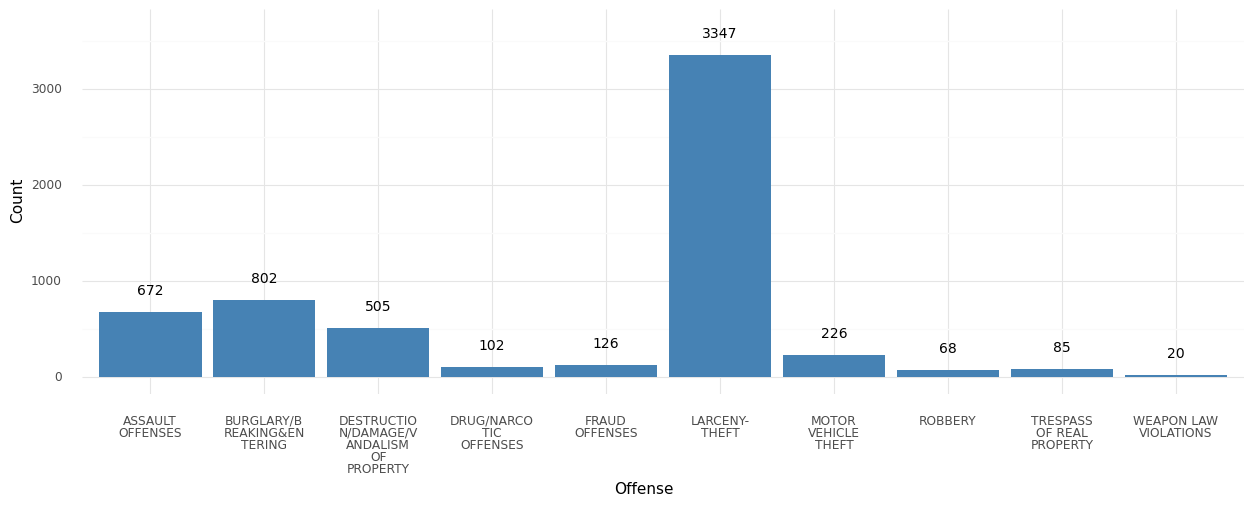

<ggplot: (8739605025374)>

In [170]:
(
    ggplot(data=university_offense_tally_freq_df, mapping=aes(x='Offense', y='Count')) +
    geom_bar(stat="identity", fill="steelblue")+
    geom_text(aes(label='Count'), va='top', color="black", size=10, nudge_y=300)+
    theme_minimal() + 
    theme(figure_size=(15, 5))
)

### 5-5: homocide counts every year
First, I will filter the entire dataset to keep only the homicide crime listing, and then tally the annual number of homicide crimes. Finally, I will make a time series graph to visually present the number of homicide crimes, where readers can visually observe whether Seattle has a record high homicide crime count in 2020.

In [17]:
# 5-5 only uses offense_start_date_cleaned and offense_parent_group (where Homicide offenses are described)
police_data_homicide = police_data_cleaned[['offense_start_date_cleaned', 'offense_parent_group']]

# Only keep rows which crime_against_category is either PERSON or PROPERTY (df.loc[].....?)
police_data_homicide = police_data_homicide[police_data_homicide['offense_parent_group'] == "HOMICIDE OFFENSES"]

print(police_data_homicide.head(10))

# Print all unique offense_parent_group String values
#print(police_data_COVID['offense_parent_group'].unique())

      offense_start_date_cleaned offense_parent_group
5745         2019-12-08 08:16:00    HOMICIDE OFFENSES
11631        2019-10-12 18:02:00    HOMICIDE OFFENSES
14780        2019-09-13 21:22:00    HOMICIDE OFFENSES
17292        2019-08-22 02:30:00    HOMICIDE OFFENSES
18103        2019-08-14 19:04:00    HOMICIDE OFFENSES
18158        2019-08-14 12:24:00    HOMICIDE OFFENSES
19366        2019-08-04 02:04:00    HOMICIDE OFFENSES
20156        2019-07-26 18:47:00    HOMICIDE OFFENSES
22319        2019-07-09 19:24:00    HOMICIDE OFFENSES
22525        2019-07-07 01:54:00    HOMICIDE OFFENSES


In [18]:
# Create zero-filled dataframe that holds the count of each crime_against_category (from 2008 to the past year)
index = pd.Series(pd.date_range(datetime.strptime('2008', '%Y'), datetime.now(), freq='Y'))
index = index.dt.strftime('%Y')

# Use unique value of crime_against_category (in police data) as column header
columns = ['Homicide Frequency']
annual_homicide_tally = pd.DataFrame(index=index, columns=columns)
annual_homicide_tally = annual_homicide_tally.fillna(0)

# Using code above, the data frame's index is the day; hence we need to create another month columns (whose values are year and month only)
annual_homicide_tally['Year'] = annual_homicide_tally.index
annual_homicide_tally['Year'] = annual_homicide_tally['Year'].astype('string')

#print(person_property_offense_tally.dtypes)
print(annual_homicide_tally)

      Homicide Frequency  Year
2008                   0  2008
2009                   0  2009
2010                   0  2010
2011                   0  2011
2012                   0  2012
2013                   0  2013
2014                   0  2014
2015                   0  2015
2016                   0  2016
2017                   0  2017
2018                   0  2018
2019                   0  2019
2020                   0  2020


In [19]:
# Tally number of offences

limit = 10
count = 0

for index, row in police_data_homicide.iterrows():
    date = row['offense_start_date_cleaned']
    year_string = date.strftime("%Y")
    #print(date_string + ' ' + one_offense)
    annual_homicide_tally.loc[annual_homicide_tally['Year'] == year_string, 'Homicide Frequency'] += 1
    count = count + 1
    
#print('Now printing the daily person/property offense tally')
print(annual_homicide_tally)

# Make a .csv file so end users can use a software of their choice to produce different plots.
annual_homicide_tally.to_csv('Question 5-5 out.csv', index=False)

      Homicide Frequency  Year
2008                  30  2008
2009                  21  2009
2010                  19  2010
2011                  24  2011
2012                  24  2012
2013                  26  2013
2014                  28  2014
2015                  28  2015
2016                  21  2016
2017                  30  2017
2018                  34  2018
2019                  38  2019
2020                  55  2020


Plot annual homicide offense frequency bar graph

Please note: the current year is not included in the frequency bar graph, as historical data encompasses all 12-months of data, while the current year data is less than 12 months.

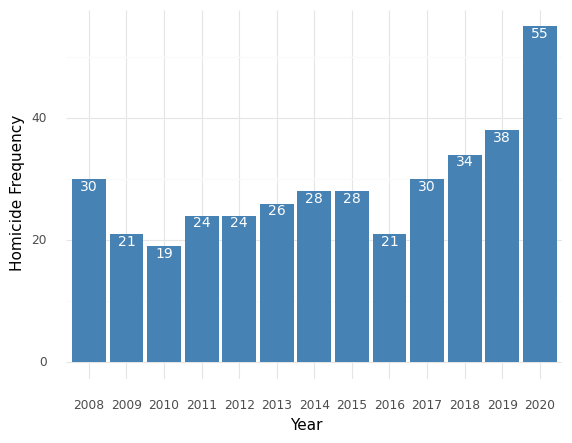

<ggplot: (8770693627399)>

In [20]:
(
    ggplot(data=annual_homicide_tally, mapping=aes(x='Year', y='Homicide Frequency')) +
    geom_bar(stat="identity", fill="steelblue")+
    geom_text(aes(label='Homicide Frequency'), va='top', color="white", size=10)+
    theme_minimal()
)

## Ethical consideration

* Crime classification is subjective, and one person may categorize a crime differently than another person.
* Crime offenses that are subsequently acquitted may not be removed from this dataset, resulting in a higher number of crime entries than actual prosecutable offenses.

## Unknown and dependencies:

* The Seattle Crime dataset may not contain all crimes that actually happened in the city. The website stated that only finalized (UCR approved) reports are published in this dataset. Those in draft, awaiting approval, or completed after the update may be published at a later date.
* When crime investigation proceeds further, crime entries may be retroactively added, updated, or removed, which may result in change of historical data when readers re-run my Jupyter notebook program at a later date.
* This dataset does not include committed crimes that are not yet discovered/found out by any police department.
* Many crimes are reported after crime offenses, and the offense date & time may not be accurate.
* University District covers a larger area than the UW itself (even though this district is very related to the UW community), and some readers may disagree with this geographical scope.